# Tutorial on Bayesian Inference

### 1. Extragalactic radio sources

Imagine a population of extragalactic radio sources: these are  complicated objects which exhibit intrinsic variations. This introduces randomness. The distribution of their flux densities is well described by a power law with slope $-\alpha$. The likelihood to measure a radio flux $S$ is then

$$ \mathcal{P}(S|\alpha) \propto S^{-\alpha} $$

1. This distribution diverges at $S=0$, but telescopes can only detect a minimal limiting flux $S_0$. For $S_0 > 0$, normalize the distribution.

**Answer**: Integrate from $S_0$ to $\infty$ over the power law.

Given is 

$$ \mathcal{P}(S|\alpha) \propto S^{-\alpha} $$

Integrate,

$$ \frac{1}{a} \int_{S_0}^\infty S^{-\alpha} \text{d}S = 1$$

where $\frac{1}{a}$ equals 1.

$$ \frac{1}{a} \Big[ \frac{S^{-\alpha + 1}}{-\alpha + 1} \Big]_{S_0}^\infty = 1$$

$$ \frac{1}{a} \Big[ - \frac{S_0^{-\alpha + 1}}{-\alpha + 1} \Big] = 1 \text{ ,where } \alpha > 1 $$

$$ a = \Big[ - \frac{S_0^{-\alpha + 1}}{-\alpha + 1} \Big] $$

$$ \mathcal{P}(S|\alpha) = \Big[ - \frac{-\alpha + 1}{S_0^{-\alpha + 1}} \Big] S^{-\alpha} $$

$$ \mathcal{P}(S|\alpha) = \Big[ \frac{\alpha - 1}{S_0^{1 - \alpha}} \Big] S^{-\alpha} $$

2. $\mathcal{P}(S|\alpha)$ describes how frequently you will find a source with flux $S$ if the Universe uses some value for $\alpha$. Imagine now the inverse problem: You measured multiple fluxes $S$ and now want to infer $\alpha$. Which distribution do you have to set up? Using a uniform prior and Bayes theorem, derive this distribution.

**Answer**: In this case, $S$ is known and you want to find $\alpha$. So $\mathcal{P}(\alpha|S)$ is what you want to find.

Bayes' Theorem gives:

$$ \mathcal{P}(\alpha|S) = \frac{\mathcal{P}(S|\alpha)\mathcal{P(\alpha)}}{\mathcal{P}(S)} $$

Given $\mathcal{P}(a)$ is a uniform distribution and $\mathcal{P}(S)$ is a normalization factor. This means $ \mathcal{P}(\alpha|S) $ and $\mathcal{P}(S|\alpha)$ scale the same. So:

$$ \mathcal{P}(\alpha|S) \propto \Big[ \frac{\alpha - 1}{S_0^{1 - \alpha}} \Big] S^{-\alpha} $$

3. Imagine a single source has been observed, and its flux has the value $2S_0$ Which calculation do you have to carry out in order to infer the most likely value of $\alpha$ after this single observation? Show that the m ost likely value is $\alpha = 2.44$

**Answer**:

Single source observation gives:

$$ S = 2S_0 $$

Show that most likely value $\alpha = 2.44$.

Fill in the value, differentiate w.r.t. $\alpha$, set equal to $0$, should give you the value $2.44$

$$ \frac{\text{d}}{\text{d}\alpha} \Big[ \frac{\alpha - 1}{(S_0)^{1 - \alpha}} (2S_0)^{-\alpha} \Big] = 0 \text{ gives } \alpha = \ln(2) + 1 = 2.44 $$

$$ \frac{\text{d}}{\text{d}\alpha} \Big[ \frac{\alpha - 1}{(S_0)^{1 - \alpha}} (2S_0)^{-\alpha} \Big] = $$

$$ \frac{\text{d}}{\text{d}\alpha} \Big[ \frac{(2S_0)^{-\alpha}}{(S_0)^{1 - \alpha}} \alpha - 1 \Big] = $$

$$ \frac{\text{d}}{\text{d}\alpha} \Big[ \frac{1}{S_0} 2^{-\alpha} \alpha - 1 \Big] = $$

$$ \frac{\text{d}}{\text{d}\alpha} \Big[ \frac{\alpha-1}{S_0} 2^{-\alpha \Big]} = $$

$$ \frac{\text{d}}{\text{d}\alpha} (\alpha-1) 2^{-\alpha} = 0 $$

$$ -1 \cdot 2^{-\alpha} + (1-\alpha) -2^{-\alpha} \ln(2) = 0 $$

$$ (1-\alpha) - 2^{-\alpha}(1 - \ln{2}) = 0$$

$$ 1 - \alpha = - \frac{1}{\ln{2}} $$

$$ \alpha = \ln(2) + 1 = 2.44 $$

Some sign mistakes in here.

4. Plot the posterior of $\alpha$. If you quoted a standard deviation for the uncertainty of $\alpha$, which information would this omit?

**Answer**: You would assume then that the shape is Gaussian, which might not necessarily be so, so you would omit the shape of the distribution.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def likelihood_norm(S,alpha,S_0):
    return (alpha-1)/(S_0**(1-alpha))*S**-alpha

In [7]:
s0 = 3
S = np.linspace(s0,20,1000)
P = likelihood_norm(S,1.4,s0)

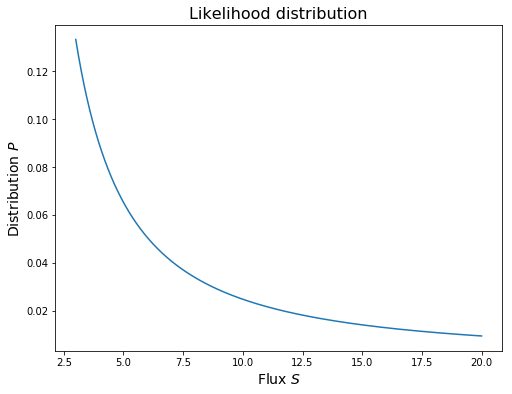

In [14]:
plt.figure(figsize=(8,6))
plt.plot(S,P)
plt.xlabel('Flux $S$',fontsize=14)
plt.ylabel('Likelihood $P$',fontsize=14)
plt.title('Likelihood distribution',fontsize=16)
plt.show()
plt.close()

In [15]:
s0 = 3
alpha = np.linspace(1,10,1000)
P = likelihood_norm(2*s0,alpha,s0)

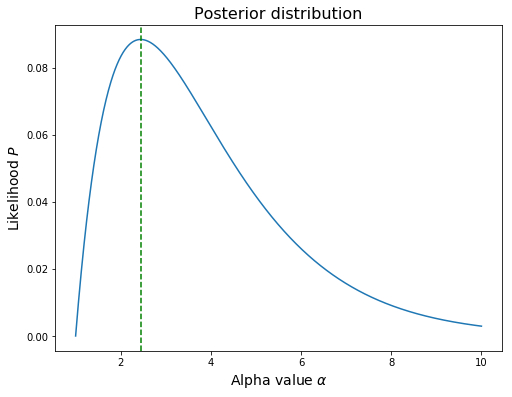

In [23]:
plt.figure(figsize=(8,6))
plt.plot(alpha,P)
plt.xlabel(r'Alpha value $\alpha$',fontsize=14)
plt.ylabel(r'Likelihood $P$',fontsize=14)
plt.title('Posterior distribution',fontsize=16)
plt.axvline(2.44,ls='dashed',c='g')
plt.show()
plt.close()

### 2. Modelling and inferring stellar properties

According to the Stefan-boltzmann law, the luminosity $L$ of a star (seen as a black body) scales with its area $A$ and temperature $T$ as

$$ L = \sigma_T A T^4 $$

1. Stellar temperatures result from a complicated stellar formation process and therefore vary between the stars. Assume here that the stellar temperatures are drawn from

$$ T \sim \mathcal{G}(T_0,\sigma) $$

Derive the distribution $\mathcal{P}(L)$ of the resulting stellar luminosities.

**Answer**:

$$ \mathcal{P}(L)dL = \mathcal{P}(T)dT $$

$$ \mathcal{P}(L) = \mathcal{P}(T) \bigg| \frac{dT}{dL} \bigg| $$

$$ L = \sigma_T A T^4 \text{ gives } T = \bigg( \frac{L}{\sigma_T A} \bigg)^\frac{1}{4} $$

$$ \frac{dT}{dL} = \frac{1}{4} \bigg( \frac{L}{\sigma_T A} \bigg)^{-\frac{3}{4}} $$

$$ \mathcal{P}(L) = \mathcal{P}(T) \cdot \frac{1}{4} \bigg( \frac{L}{\sigma_T A} \bigg)^{-\frac{3}{4}} $$

$$ \mathcal{P}(T(L)) = \frac{1}{{\sigma \sqrt{2\pi }}} e^{{{ -0.5 \left( {T - T_0 } \right)^2/\sigma^2 }}} = \frac{1}{{\sigma \sqrt{2\pi }}} e^{{{ -0.5 \left( {\bigg( \frac{L}{\sigma_T A} \bigg)^\frac{1}{4} - T_0 } \right)^2/\sigma^2 }}} $$

$$ \mathcal{P}(L) = \frac{1}{{\sigma \sqrt{2\pi }}} e^{{{ -0.5 \left( {\bigg( \frac{L}{\sigma_T A} \bigg)^\frac{1}{4} - T_0 } \right)^2/\sigma^2 }}} \cdot \frac{1}{4} \bigg( \frac{L}{\sigma_T A} \bigg)^{-\frac{3}{4}} $$

**Question**: Is this correct?

2. For $T_0 = 10$, $\sigma=1$, $A=1$, plot the distribution function of stellar luminosities.

In [30]:
T_0 = 10
sigma = 1
A = 1
L = np.linspace(1,30000,30000)

In [31]:
def lum_dist(L,T_0,sigma,A):
    ratio = L/(sigma*A)
    exponent = -0.5*(((ratio)**0.25-T_0)**2)/sigma**2
    part_1 = 1/(sigma*np.sqrt(2*np.pi))*np.exp(exponent)
    part_2 = 0.25*ratio**-0.75
    total = part_1 * part_2
    return total

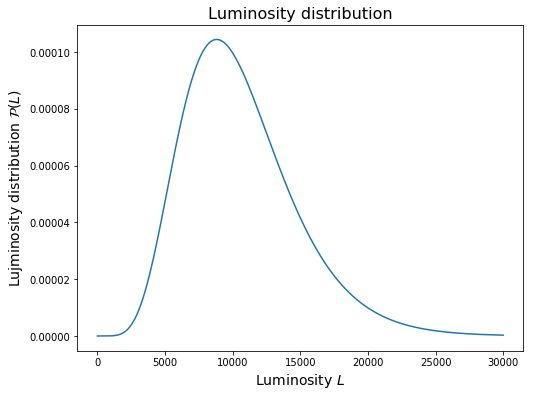

In [32]:
plt.figure(figsize=(8,6))
plt.plot(L,lum_dist(L,T_0,sigma,A))
plt.xlabel(r'Luminosity $L$',fontsize=14)
plt.ylabel(r'Lujminosity distribution $\mathcal{P}(L)$',fontsize=14)
plt.title('Luminosity distribution',fontsize=16)
plt.show()
plt.close()

3. Generate random samples from $\mathcal{P}(L)$, histogram them, and show that the histogram approximates $\mathcal{P}(L)$ for sufficiently many samples.

In [57]:
L_100 = np.random.randint(1,30000,100)
print(L_100)
P_L = lum_dist(L,T_0,sigma,A)

[19902  1268 16803 15038 16842  7799  6784 17618  2229 25901  7998 16552
  7858 10467  9809   278 19571  5113 19998 12650 18287 29254   212  9939
  9678  2400  6091 23553 26375   219   965 19626 25982 18134 27217 24163
 22713 27219  5867 19481 21635 14791 29075 18143 19429   337 24706  7832
 16590  2271 12275 17185 17905 28264  8989  1667   448  6889  2566 26874
  9189 20711 14908 29464 25490 25886  3211 17773  5574 24525 16196 28397
  3269   473  7972 19989 11580 10558 14811 25081   892  6132 14822 11046
  6242  6558 13353 14224   779  7594  8140 26153 20202 18929 16620   327
   697 16449  7771  8247]


AttributeError: Unknown property binsize

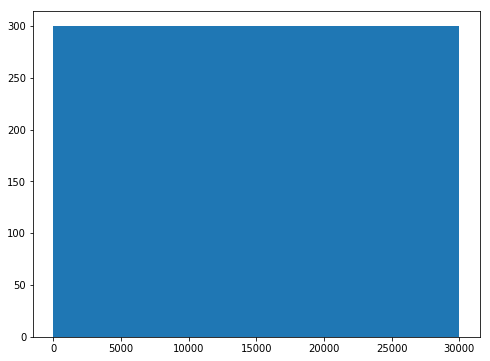

In [60]:
plt.figure(figsize=(8,6))
plt.hist(L,bins=100,binsize=0.9)
plt.show()
plt.close()

### 3. Satellites: the next generation

Measurement campaigns are frequently organized in stages. For example, an elderly satellite will be replaced by a new satellite with the same scientific task but better design. This happened e.g. when WMAP was followed up by Planck. In this context, the posterior of an old  experiment can be reinterpreted as a ‘datadriven prior’, and can then be combined with the likelihood of the new experiment, to yield the updated posterior. Here, we investigate this interplay of priors and likelihoods. Assume a data point $y$ has a Gaussian sampling distribution with mean $\theta$ and variance $\sigma^2$

$$ y \sim \mathcal{G}(\theta,\sigma^2) $$

The Gaussian is self-conjugate, i.e. a Gaussian prior times a Gaussian likelikhood will lead to a Gaussian posterior. Therefore, let us use the prior

$$ \theta \sim \mathcal{G}(\mu_0,\tau_0^2) $$

1. Which hypter-parameters occur here?

2. Derive the posterior $\mathcal{P}(\theta|y)$

3. Plot prior and posterior.

4. For which values of the hyperparameters do you have a highly informative, or uninformative prior?

5. If the prior describes the older experiment, what does an informative prior then express?

6. If the prior does not describe any older experiment, but simply an assumed distribution which on eneeds to pick because one needs a prior after all... what does the informative prior then describe?

7. How do you have to set the hyper-parameters to reach a limit where the prior disagrees with the sampling distribution on likely values for $\theta$? If the prior describes an older experiment, what does this disagreement then describe?